In [1]:
import pandas as pd
import numpy as np
#import ast
from helper import util_pids, util_visualizations
import matplotlib.pyplot as plt

# 1. Subclasses

In [2]:
# read data
subclasses = pd.read_csv('/path/to/9_FINAL/data/machine_learning/subclasses.csv', sep=";")
del subclasses['Unnamed: 0']
subclasses.head()

,subClass,class,frequency,pidspread,pldspread,id,pids
0,10,decade,2,1,2,108191420,['p3a']
1,abbess,nun,12,7,11,403873869,"['p4p8ap3a', 'p3a', 'p8b', 'p4', 'p8b', 'p27a'..."
2,abbot,person,48,7,32,156276663,"['p4p1', 'p1', 'p1', 'p1', 'p1', 'p8b', 'p3a',..."
3,actuary,statistician,3,2,3,512259817,['p4p8a']
4,activist,person,172,16,101,485263422,"['p4p23dp2p39p1p23ap23bp8ap3ap43', 'p6p8bp3ap4..."


In [3]:
# get shape for sanity check
subclasses.shape

(3798, 7)

## 1.1 pid count

In [4]:
# get all unique pids
subclass_unique_pids = util_pids.get_all_different_pids(subclasses, 'pids')
len(subclass_unique_pids)

57

In [5]:
# count how many occurrences of pids exist in column
subclasses_counts_pids = util_pids.append_count_pids_to_data(subclasses, subclass_unique_pids, 'pids')

In [6]:
# show data
subclasses_counts_pids

,subClass,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,10,decade,2,1,2,108191420,[p3a],0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbess,nun,12,7,11,403873869,"[p4p8ap3a, p3a, p8b, p4, p8b, p27a, p2, p1]",1,0,0,...,2,0,0,0,0,0,1,2,0,0
2,abbot,person,48,7,32,156276663,"[p4p1, p1, p1, p1, p1, p8b, p3a, p5, p1, p8a, ...",13,0,0,...,1,0,0,2,0,0,6,6,0,0
3,actuary,statistician,3,2,3,512259817,[p4p8a],0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,activist,person,172,16,101,485263422,"[p4p23dp2p39p1p23ap23bp8ap3ap43, p6p8bp3ap43, ...",15,0,0,...,5,0,8,1,1,0,17,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,zimbabweans,person,1,1,1,144540438,[p1],1,0,0,...,0,0,0,0,0,0,0,0,0,0
3794,zine,work,32,10,26,170394103,"[p5p1p20a, p8a, p8a, p8a, p3a, p3a, p36, p1, p...",6,0,0,...,0,0,0,2,0,0,10,1,0,0
3795,zine,periodical,23,5,15,189735779,"[p4p1, p1p3a, p3a, p12a, p3a, p1, p8a, p4, p1,...",6,0,0,...,2,0,0,0,0,0,2,0,0,0
3796,zine,publication,124,12,96,418332088,"[p5p34p4p1p8ap28dp3a, p1p8a, p1, p1, p1, p8a, ...",25,0,0,...,2,0,0,8,0,0,36,0,0,0


In [8]:
# if session is aborted, read data
subclasses_counts_pids = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/subclasses_count_based.csv',sep=";")
del subclasses_counts_pids['Unnamed: 0']
subclasses_counts_pids.shape

(3798, 64)

## 1.2 Max of counts

In [9]:
# show maximum count
util_pids.get_max_counts(subclasses_counts_pids, 'pids')

Max of 12124 is found for pattern p8a


In [10]:
# sanity check
subclasses_counts_pids[subclasses_counts_pids['p8a'] == 12124]

,subClass,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
501,foundation,organization,29527,43,13872,23176288,['p7p6p5p4p1p8ap8bp43p26p13p23ap23bp11p28bp3a'...,1371,91,2,...,121,0,5,2616,9,7,12124,77,28,1


In [11]:
# get maxes per pid
subclass_max = util_pids.get_max_counts_per_pattern(subclasses_counts_pids, 'pids')

In [12]:
subclass_max.head()

,pid,max_usage
0,p1,2237
1,p10,684
2,p11,15
3,p12a,261
4,p12b,2


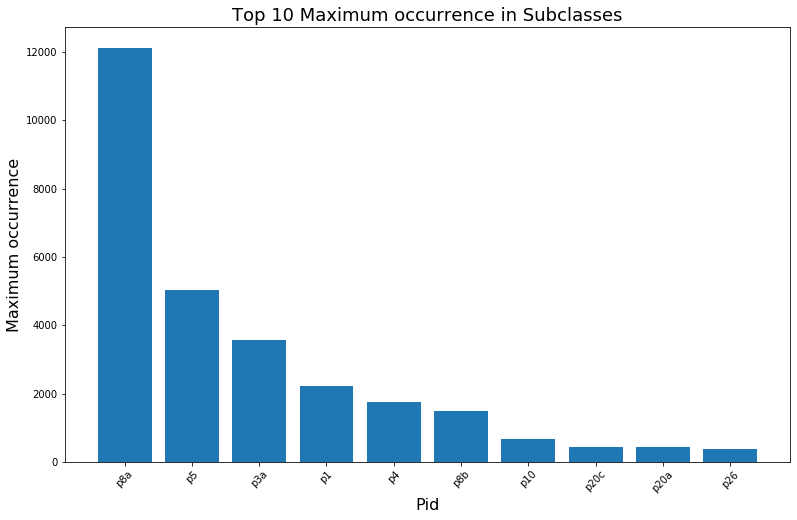

In [13]:
# Visualize Top 10 occurrences
util_visualizations.visualize_max_pids(subclass_max, 'Subclasses')

## 1.3 Get means of occurrences

In [14]:
# get means per pid
subclass_mean = util_pids.get_mean_counts_per_pattern(subclasses_counts_pids, 'pids')

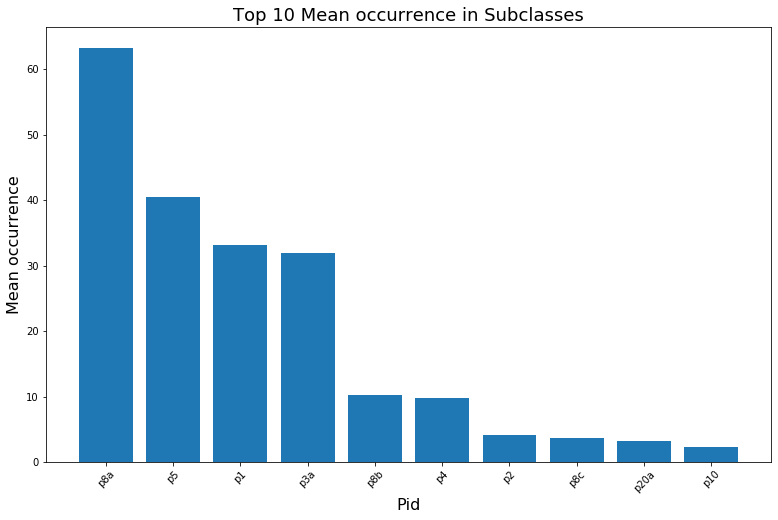

In [15]:
# Visualize Top 10 mean occurrences
util_visualizations.visualize_mean_pids(subclass_mean, 'Subclasses')

# 2. types

In [16]:
# read data
types = pd.read_csv('/path/to/9_FINAL/data/machine_learning/types.csv', sep=";")
del types['Unnamed: 0']
types.head()

,instance,class,frequency,pidspread,pldspread,id,pids
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']"
1,196,year,1,1,1,250210719,['p8b']
2,53,year,2,1,1,333976287,['p8b']
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b..."
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b..."


In [17]:
# get shape
types.shape # -> ok! 118,167

(118167, 7)

## 2.1 pid count

In [18]:
# get all unique pids
types_unique_pids = util_pids.get_all_different_pids(types, 'pids')
len(types_unique_pids)

58

In [19]:
# count how many occurrences of pids exist in column
types_counts_pids = util_pids.append_count_pids_to_data(types, types_unique_pids, 'pids')
types_counts_pids

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,1988,album,4,2,4,89520215,"[p3a, p5, p5, p3a]",0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,196,year,1,1,1,250210719,[p8b],0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,year,2,1,1,333976287,[p8b],0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2007,year,104,6,57,179643001,"[p25p8ap8b, p8b, p8b, p25, p8b, p8b, p8a, p8b,...",1,0,0,...,0,0,0,0,0,0,6,74,0,0
4,2,aircraft,21,4,16,472381603,"[p8b, p8b, p8b, p3a, p8b, p5, p8b, p8a, p8a, p...",0,0,0,...,0,0,0,1,0,0,3,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118162,india,city,251,29,206,205155758,"[p5p4p1p15bp23ap24p8ap3a, p21bp21cp21dp12ap3a,...",22,1,0,...,2,0,2,19,0,0,35,3,1,0
118163,india,settlement,29,7,26,259383873,"[p1, p2p25p8ap8b, p21b, p8a, p8b, p8a, p3a, p8...",1,0,0,...,0,0,0,0,0,0,5,2,0,0
118164,in-a-gadda-da-vida,song,8,3,7,203100816,"[p8a, p8a, p8a, p8a, p8b, p8a, p20a]",0,0,0,...,0,0,0,0,0,0,5,1,0,0
118165,interfaithfamily,organization,2,2,1,241033740,"[p8a, p5]",0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [21]:
# import to avoid costly computations
types_counts_pids = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/types_count_based.csv',sep=";")
del types_counts_pids['Unnamed: 0']

In [22]:
# Sanity check for shape
types_counts_pids.shape

(118167, 65)

## 2.2 Max counts

In [23]:
# show maximum count
util_pids.get_max_counts(types_counts_pids, 'pids')

Max of 13003 is found for pattern p8a


In [25]:
# sanity check
types_counts_pids[types_counts_pids['p8a'] == 13003]

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
103317,world,place,64845,47,19461,367161705,['p7p5p4p2p1p12ap43p26p15ap24p20cp20bp20dp20ap...,170,28,3,...,21,0,69,123,5,6,13003,2150,118,95


In [26]:
# get maxes per pid
types_max = util_pids.get_max_counts_per_pattern(types_counts_pids, 'pids')

In [27]:
types_max.head()

,pid,max_usage
0,p1,7237
1,p10,684
2,p11,33
3,p12a,261
4,p12b,4


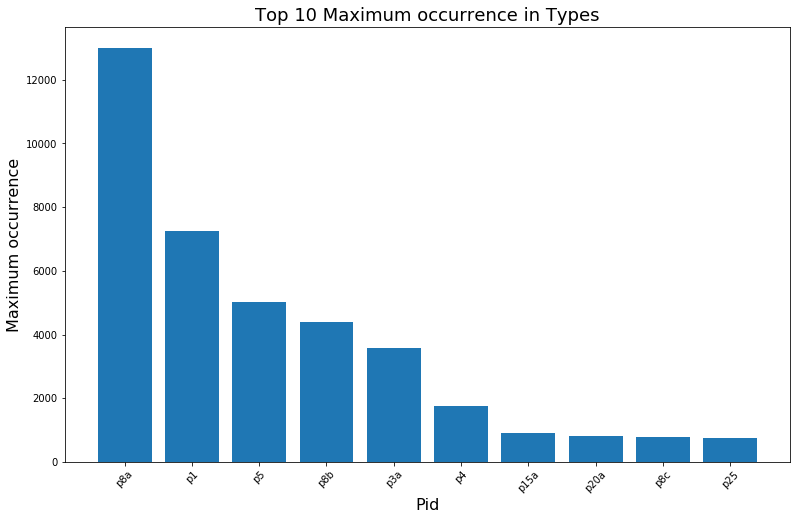

In [28]:
# Visualize Top 10 occurrences
util_visualizations.visualize_max_pids(types_max, 'Types')

## 2.3 Mean counts

In [29]:
# get means per pid
types_mean = util_pids.get_mean_counts_per_pattern(types_counts_pids, 'pids')

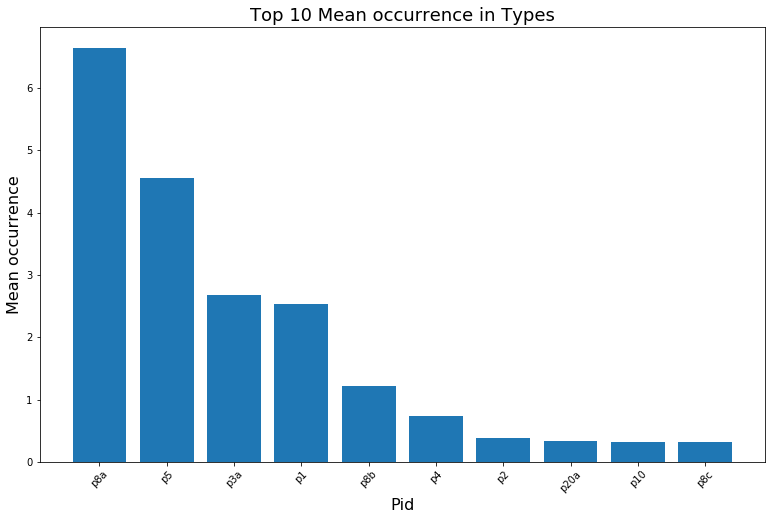

In [30]:
# Visualize Top 10 mean occurrences
util_visualizations.visualize_mean_pids(types_mean, 'Types')

# 3. Negative examples

In [32]:
# read in negative examples
negatives = pd.read_csv('/path/to/9_FINAL/data/all_negative_examples.csv', sep=";")
del negatives['Unnamed: 0']
negatives.head()

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,1643854,1866,railway,1,1,1,['p8b']
1,1648888,1960,library,6,5,6,"['p23a', 'p12a', 'p20a', 'p8a', 'p8b', 'p8a']"
2,1673500,1960,costume,3,1,3,['p2']
3,1678428,1975,epithet,1,1,1,['p5']
4,1678435,2000,habitat,1,1,1,['p8b']


In [33]:
# delete same observations for instance and class
negatives = util_pids.data_without_equal_instance_class(negatives, 'instance', 'class')

negatives.shape # -> ok 6,842,160 

(6842160, 7)

In [35]:
# kernel died because size too big -> chop into eight negatives
negatives_1 = negatives.iloc[:int(len(negatives)/8)]
negatives_1

,_id,instance,class,frequency,pidspread,pldspread,modifications
0,1643854,1866,railway,1,1,1,['p8b']
1,1648888,1960,library,6,5,6,"['p23a', 'p12a', 'p20a', 'p8a', 'p8b', 'p8a']"
2,1673500,1960,costume,3,1,3,['p2']
3,1678428,1975,epithet,1,1,1,['p5']
4,1678435,2000,habitat,1,1,1,['p8b']
...,...,...,...,...,...,...,...
855265,95385086,book,sheep,12,3,11,"['p8ap8c', 'p3a', 'p8a', 'p8a', 'p8a', 'p3a', ..."
855266,95385809,book,worst,13,7,12,"['p23dp20bp12ap8ap20a', 'p8a', 'p20b', 'p23b',..."
855267,95397842,boot,rebel,2,2,2,"['p43', 'p5']"
855268,95402761,boot,wagon,2,1,2,"['p8a', 'p8a']"


In [36]:
negatives_2 = negatives.iloc[int(len(negatives)/8):(2*int(len(negatives)/8))]
negatives_2

,_id,instance,class,frequency,pidspread,pldspread,modifications
855270,95415025,bonn,group,2,2,2,"['p8a', 'p5']"
855271,95423287,bomb,nerve,1,1,1,['p8a']
855272,95445297,bowl,relic,11,7,11,"['p3a', 'p20a', 'p2', 'p8a', 'p5', 'p8a', 'p8a..."
855273,95445843,bowl,relay,1,1,1,['p8a']
855274,95447661,bott,snake,1,1,1,['p43']
...,...,...,...,...,...,...,...
1710535,396854055,degree,photon,1,1,1,['p21c']
1710536,396856947,debrii,member,1,1,1,['p3a']
1710537,396865559,deeper,object,1,1,1,['p8a']
1710538,396868339,debate,casino,4,1,4,['p28c']


In [37]:
negatives_3 = negatives.iloc[2*int(len(negatives)/8):(3*int(len(negatives)/8))]
negatives_3

,_id,instance,class,frequency,pidspread,pldspread,modifications
1710540,396875457,desire,debate,17,8,17,"['p8a', 'p8ap3a', 'p24', 'p3a', 'p23c', 'p43',..."
1710541,396878347,decree,school,3,3,3,"['p26', 'p28b', 'p34']"
1710542,396882984,denial,priest,3,3,3,"['p21a', 'p43', 'p21b']"
1710543,396885902,deceit,leader,3,2,3,"['p24', 'p5']"
1710544,396889847,desire,throne,2,1,2,['p8b']
...,...,...,...,...,...,...,...
2565805,375982331,guild,chair,3,2,2,"['p8b', 'p16', 'p8b']"
2565806,375982335,guild,chain,1,1,1,['p8a']
2565807,375982999,guild,chart,1,1,1,['p27b']
2565808,375988440,guava,shrub,42,4,33,"['p8a', 'p8ap3a', 'p5', 'p8a', 'p1', 'p8a', 'p..."


In [38]:
negatives_4 = negatives.iloc[3*int(len(negatives)/8):(4*int(len(negatives)/8))]
negatives_4

,_id,instance,class,frequency,pidspread,pldspread,modifications
2565810,376031946,guild,choir,1,1,1,['p8a']
2565811,376083257,guise,sedan,2,2,2,"['p8b', 'p2']"
2565812,376084075,gundy,event,1,1,1,['p5']
2565813,376090530,gupta,woman,11,4,10,"['p3a', 'p8a', 'p8a', 'p5', 'p8b', 'p8b', 'p8a..."
2565814,376102792,guild,group,1877,34,709,['p6p5p4p1p8dp12ap8ap8cp8bp36p26p23dp23bp21dp2...
...,...,...,...,...,...,...,...
3421075,121816493,lesser,decoy,1,1,1,['p8c']
3421076,121817138,legacy,angel,4,4,4,"['p28b', 'p8a', 'p3a', 'p2']"
3421077,121819464,levine,flute,1,1,1,['p5']
3421078,121831074,lentil,berry,2,2,2,"['p2', 'p34']"


In [39]:
negatives_5 = negatives.iloc[4*int(len(negatives)/8):(5*int(len(negatives)/8))]
negatives_5

,_id,instance,class,frequency,pidspread,pldspread,modifications
3421080,121834702,letter,baker,10,3,3,"['p23bp3a', 'p8a']"
3421081,121836655,length,mouse,8,5,8,"['p25', 'p21a', 'p21b', 'p21a', 'p25', 'p5', '..."
3421082,121837462,length,movie,50,15,42,"['p26p2p23b', 'p3a', 'p21d', 'p21b', 'p3a', 'p..."
3421083,121837670,letter,barge,1,1,1,['p5']
3421084,121842213,length,watch,29,5,28,"['p3a', 'p3a', 'p8a', 'p5', 'p23a', 'p3a', 'p3..."
...,...,...,...,...,...,...,...
4276345,248004386,nun,fund,5,1,3,"['p5', 'p5']"
4276346,248010085,nus,cost,15,8,13,"['p1p23bp3a', 'p5', 'p27b', 'p1', 'p5', 'p25',..."
4276347,248010959,nus,coin,1,1,1,['p21d']
4276348,248018457,nur,root,1,1,1,['p21c']


In [40]:
negatives_6 = negatives.iloc[5*int(len(negatives)/8):(6*int(len(negatives)/8))]
negatives_6

,_id,instance,class,frequency,pidspread,pldspread,modifications
4276350,248071165,nur,sale,1,1,1,['p5']
4276351,248071167,nun,goth,1,1,1,['p8a']
4276352,248071201,nur,salt,4,1,2,"['p3a', 'p3a', 'p3a']"
4276353,248071479,nun,good,1,1,1,['p27b']
4276354,248097303,nus,duck,1,1,1,['p8a']
...,...,...,...,...,...,...,...
5131615,425974694,relationship,township,1,1,1,['p5']
5131616,425977292,re-invention,catalyst,1,1,1,['p8a']
5131617,425979019,reproduction,metaphor,3,2,3,"['p8a', 'p8a', 'p5']"
5131618,425979661,relationship,calendar,2,2,2,"['p34', 'p5']"


In [41]:
negatives_7 = negatives.iloc[6*int(len(negatives)/8):(7*int(len(negatives)/8))]
negatives_7

,_id,instance,class,frequency,pidspread,pldspread,modifications
5131620,425983190,restaurateur,employee,1,1,1,['p8a']
5131621,425983585,relationship,hospital,35,12,31,"['p12a', 'p34', 'p12a', 'p1', 'p2', 'p1', 'p8b..."
5131622,425983964,relationship,zionists,1,1,1,['p1']
5131623,425989420,reproduction,monopoly,1,1,1,['p23b']
5131624,425990963,relationship,molecule,23,7,18,"['p34', 'p28d', 'p1', 'p4', 'p1', 'p1', 'p8a',..."
...,...,...,...,...,...,...,...
5986885,76094710,symptom,noun,2,1,2,"['p2', 'p2']"
5986886,76094993,symptom,nose,171,10,123,"['p8ap8cp8bp43', 'p8dp8ap8cp8b', 'p8ap8c', 'p8..."
5986887,76121608,synovus,year,1,1,1,['p8b']
5986888,76162213,symptom,race,2,2,2,"['p8a', 'p2']"


In [42]:
negatives_8 = negatives.iloc[(7*int(len(negatives)/8)):]
negatives_8

,_id,instance,class,frequency,pidspread,pldspread,modifications
5986890,76163091,symptom,raft,1,1,1,['p3a']
5986891,76163269,symptom,rate,118,12,92,"['p21ap21b', 'p3a', 'p8ap8c', 'p5', 'p3a', 'p5..."
5986892,76163911,symptom,rank,2,2,1,"['p21a', 'p8a']"
5986893,76194538,synctoy,part,3,1,3,['p21a']
5986894,76204368,symptom,play,4,4,4,"['p10', 'p8a', 'p43', 'p8b']"
...,...,...,...,...,...,...,...
6842155,467302079,zzz,model,1,1,1,['p5']
6842156,467609399,zzz,datum,1,1,1,['p21a']
6842157,468882452,zzz,skill,2,1,1,['p8a']
6842158,470608021,zzz,sound,1,1,1,['p8b']


In [43]:
len(negatives_1) + len(negatives_2) + len(negatives_3) + len(negatives_4) + len(negatives_5) + len(negatives_6) + len(negatives_7) + len(negatives_8)

6842160

## 3.1 Pid counts

## 3.1.1 Loop through 8 negatives

In [44]:
# since memory error
# append number of occurrences as new column to negatives dataframe
counter = 1

for element in [negatives_1, negatives_2, negatives_3, negatives_4, negatives_5, negatives_6, negatives_7, negatives_8]:
    negative_with_pid = util_pids.append_count_pids_to_data(element, types_unique_pids, 'modifications')
    print('Done with {}'.format(counter))
    
    filename = str(counter) + '_count_based.csv'
    negative_with_pid.to_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_'+filename, sep=";")
    counter += 1

Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8


## 3.1.2 Stack all negatives back together

In [45]:
# get 1 and 2
negative_1 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_1_count_based.csv', sep=";")
del negative_1['Unnamed: 0']

negative_2 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_2_count_based.csv', sep=";")
del negative_2['Unnamed: 0']

In [46]:
# negatives 3 and 4
negative_3 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_3_count_based.csv', sep=";")
del negative_3['Unnamed: 0']

negative_4 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_4_count_based.csv', sep=";")
del negative_4['Unnamed: 0']

In [47]:
# get 5 and 6
negative_5 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_5_count_based.csv', sep=";")
del negative_5['Unnamed: 0']

negative_6 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_6_count_based.csv', sep=";")
del negative_6['Unnamed: 0']

In [48]:
# get 7 and 8
negative_7 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_7_count_based.csv', sep=";")
del negative_7['Unnamed: 0']

negative_8 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_8_count_based.csv', sep=";")
del negative_8['Unnamed: 0']

## 3.2 Get max

In [49]:
# show maximum count in 1 
util_pids.get_max_counts(negative_1, 'modifications')

Max of 9696 is found for pattern p8a


In [50]:
# sanity check
negative_1[negative_1['p8a'] == 9696]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
502835,216526133,association,organization,41220,46,15914,['p6p5p4p1p12ap8ap8cp8bp36p26p15ap25p23bp20bp2...,3265,132,3,...,477,0,5,5887,38,9,9696,129,33,0


In [51]:
# show maximum count in 2
util_pids.get_max_counts(negative_2, 'modifications')

Max of 8029 is found for pattern p8a


In [53]:
# sanity check
negative_2[negative_2['p8a'] == 8029]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
11348,190197287,book,collection,21724,47,7573,['p7p6p5p4p2p1p43p26p25p20cp20bp20dp27bp20ap3a...,119,5,1,...,27,0,26,195,3,1,8029,584,232,35


In [54]:
# show maximum count in 3
util_pids.get_max_counts(negative_3, 'modifications')

Max of 22051 is found for pattern p8a


In [55]:
# sanity check
negative_3[negative_3['p8a'] == 22051]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
506689,151789882,following,list,81006,19,24736,['p21bp5p34p25p15bp29ap20cp8dp8ap8cp28bp20ap3a...,0,0,0,...,0,0,3,42,0,0,22051,9,32,3


In [56]:
# show maximum count in 4
util_pids.get_max_counts(negative_4, 'modifications')

Max of 9594 is found for pattern p1


In [57]:
# sanity check
negative_4[negative_4['p1'] == 9594]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
435031,413520564,information,place,13846,39,1227,['p5p4p1p10p8ap8cp8bp43p36p21bp26p34p23dp25p23...,9594,5,2,...,48,0,8,53,7,2,454,24,51,1


In [58]:
# show maximum count in 5
util_pids.get_max_counts(negative_5, 'modifications')

Max of 4492 is found for pattern p3a


In [60]:
# sanity check
negative_5[negative_5['p3a'] == 4492]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
289971,302683727,mark,record,9484,31,1371,"['p26p5p34p1p23bp8dp8ap27bp8cp20ap8bp3ap43', '...",3,1,0,...,1,0,4,11,0,0,148,127,7,5


In [61]:
# show maximum count in 6
util_pids.get_max_counts(negative_6, 'modifications')

Max of 4959 is found for pattern p8a


In [63]:
# sanity check
negative_6[negative_6['p8a'] == 4959]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
554630,133497940,president,member,16521,35,7078,['p6p5p4p2p1p10p8dp12ap8ap8cp8bp26p34p23dp23ap...,1047,9,2,...,93,0,1,92,25,9,4959,3665,10,10


In [64]:
# show maximum count in 7
util_pids.get_max_counts(negative_7, 'modifications')

Max of 29489 is found for pattern p3a


In [65]:
# sanity check
negative_7[negative_7['p3a'] == 29489]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
775832,46285798,surname,database,29886,4,15,"['p3a', 'p5', 'p1', 'p3a', 'p3a', 'p23b', 'p3a...",3,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
# show maximum count in 8
util_pids.get_max_counts(negative_8, 'modifications')

Max of 6489 is found for pattern p8b


In [67]:
# sanity check
negative_8[negative_8['p8b'] == 6489]

,_id,instance,class,frequency,pidspread,pldspread,modifications,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
804701,307070745,year,member,16153,42,6165,['p4p2p1p12ap12cp43p26p15ap25p24p20cp20bp27bp2...,338,2,5,...,18,0,13,14,5,3,2675,6489,80,29


In [68]:
# get maxes per pid
negatives_max_1 = util_pids.get_max_counts_per_pattern(negative_1, 'modifications')
negatives_max_1 = negatives_max_1.set_index(['pid'])

negatives_max_2 = util_pids.get_max_counts_per_pattern(negative_2, 'modifications')
negatives_max_2 = negatives_max_2.set_index(['pid'])

negatives_max_3 = util_pids.get_max_counts_per_pattern(negative_3, 'modifications')
negatives_max_3 = negatives_max_3.set_index(['pid'])

negatives_max_4 = util_pids.get_max_counts_per_pattern(negative_4, 'modifications')
negatives_max_4 = negatives_max_4.set_index(['pid'])

negatives_max_5 = util_pids.get_max_counts_per_pattern(negative_5, 'modifications')
negatives_max_5 = negatives_max_5.set_index(['pid'])

negatives_max_6 = util_pids.get_max_counts_per_pattern(negative_6, 'modifications')
negatives_max_6 = negatives_max_6.set_index(['pid'])

negatives_max_7 = util_pids.get_max_counts_per_pattern(negative_7, 'modifications')
negatives_max_7 = negatives_max_7.set_index(['pid'])

negatives_max_8 = util_pids.get_max_counts_per_pattern(negative_8, 'modifications')
negatives_max_8 = negatives_max_8.set_index(['pid'])

In [69]:
# add everything together
negatives_max = negatives_max_1 + negatives_max_2 + negatives_max_3 + negatives_max_4 + negatives_max_5 + negatives_max_6 + negatives_max_7 + negatives_max_8

In [70]:
# reset index
negatives_max = negatives_max.reset_index()

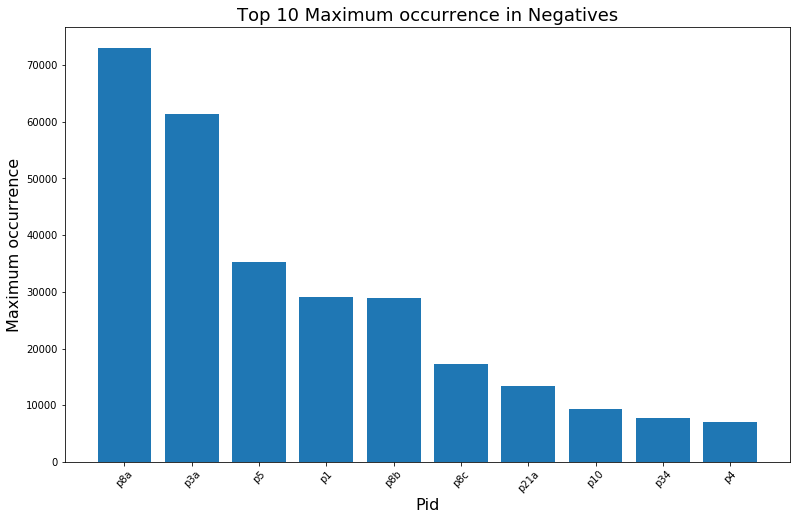

In [71]:
# Visualize Top 10 occurrences
util_visualizations.visualize_max_pids(negatives_max, 'Negatives') # TODO: this is not the real value

## 3.3 Get mean

In [72]:
# get means per pid
negatives_mean_1 = util_pids.get_mean_counts_per_pattern(negative_1, 'modifications')
negatives_mean_1 = negatives_mean_1.set_index(['pid'])

negatives_mean_2 = util_pids.get_mean_counts_per_pattern(negative_2, 'modifications')
negatives_mean_2 = negatives_mean_2.set_index(['pid'])

negatives_mean_3 = util_pids.get_mean_counts_per_pattern(negative_3, 'modifications')
negatives_mean_3 = negatives_mean_3.set_index(['pid'])

negatives_mean_4 = util_pids.get_mean_counts_per_pattern(negative_4, 'modifications')
negatives_mean_4 = negatives_mean_4.set_index(['pid'])

negatives_mean_5 = util_pids.get_mean_counts_per_pattern(negative_5, 'modifications')
negatives_mean_5 = negatives_mean_5.set_index(['pid'])

negatives_mean_6 = util_pids.get_mean_counts_per_pattern(negative_6, 'modifications')
negatives_mean_6 = negatives_mean_6.set_index(['pid'])

negatives_mean_7 = util_pids.get_mean_counts_per_pattern(negative_7, 'modifications')
negatives_mean_7 = negatives_mean_7.set_index(['pid'])

negatives_mean_8 = util_pids.get_mean_counts_per_pattern(negative_8, 'modifications')
negatives_mean_8 = negatives_mean_8.set_index(['pid'])

In [73]:
# append all means together
negatives_mean = negatives_mean_1 + negatives_mean_2 + negatives_mean_3 + negatives_mean_4 + negatives_mean_5 + negatives_mean_6 + negatives_mean_7 + negatives_mean_8

In [74]:
# reset index and calculate mean
negatives_mean = negatives_mean.reset_index()
negatives_mean['mean_usage'] = negatives_mean['mean_usage']/8

In [75]:
# export means for future uses
negatives_mean.to_csv('/path/to/9_FINAL/data/machine_learning/count_based/negatives_mean.csv', sep=";")

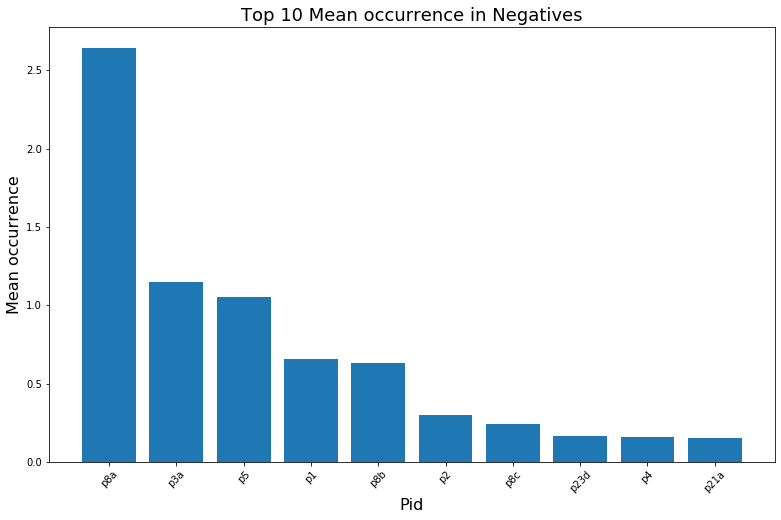

In [76]:
# Visualize Top 10 mean occurrences
util_visualizations.visualize_mean_pids(negatives_mean, 'Negatives')

# 4. Visualize all means

In [77]:
# take top 10 by mean and sort
negatives_mean_10 = negatives_mean.sort_values(by='mean_usage', ascending=False)
negatives_mean_10 = negatives_mean_10.head(10)

subclass_mean_10 = subclass_mean.sort_values(by='mean_usage', ascending=False)
subclass_mean_10 = subclass_mean_10.head(10)

types_mean_10 = types_mean.sort_values(by='mean_usage', ascending=False)
types_mean_10 = types_mean_10.head(10)

In [78]:
subclass_mean_10

,pid,mean_usage
53,p8a,63.260400
50,p5,40.423907
0,p1,33.124013
46,p3a,31.874934
54,p8b,10.168773
47,p4,9.719326
11,p2,4.128225
55,p8c,3.658241
12,p20a,3.175355
1,p10,2.366245


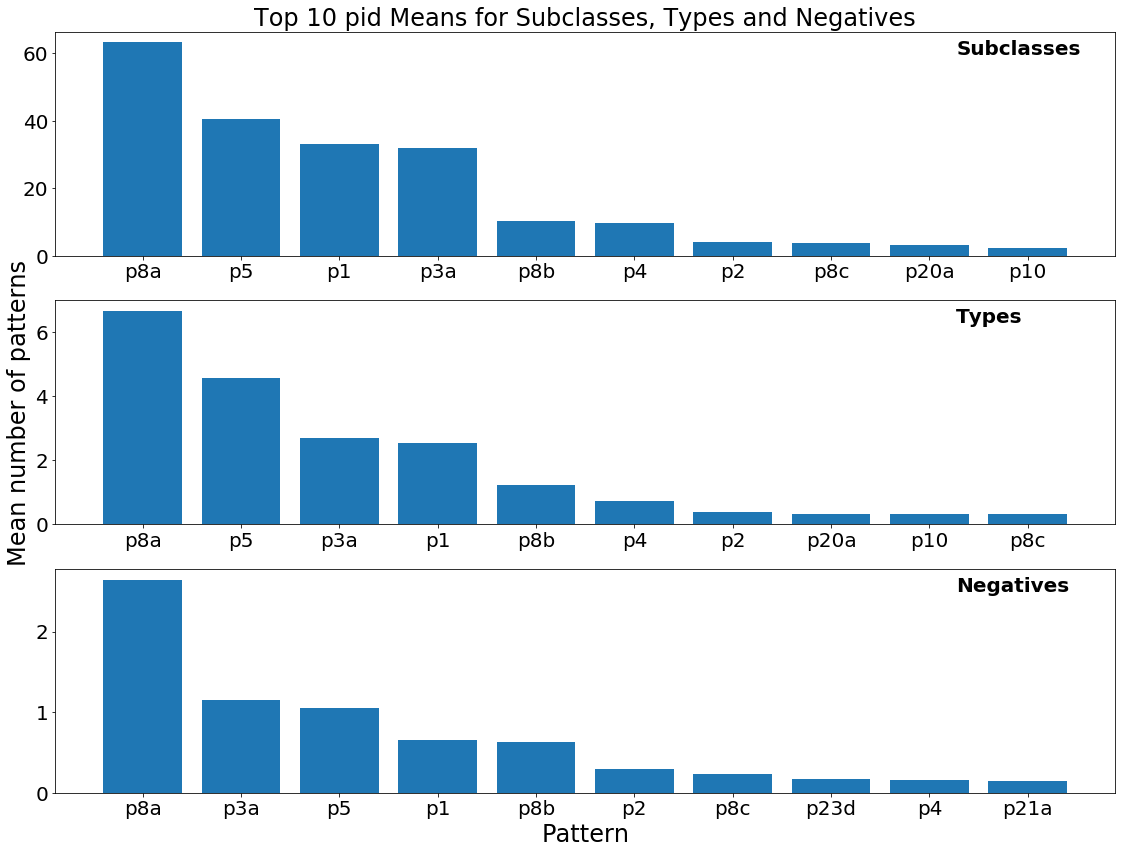

In [79]:
# show pid distribution for all three classes

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (19,14))

y_pos = np.arange(10) # get ticks for top 10s

## subclasses
ax1.bar(y_pos, subclass_mean_10['mean_usage'])
ax1.set_xticks(y_pos)
ax1.set_xticklabels(list(subclass_mean_10['pid'].values), size=16)
ax1.set_title('Top 10 pid Means for Subclasses, Types and Negatives',size=24)
#ax1.set_ylabel('Relative Frequency in %', fontsize=20)
ax1.annotate("Subclasses", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax1.tick_params(labelsize=20)
#ax2.annotate("B", xy=(0.9, 0.9), xycoords="axes fraction")

## types
#y_pos = np.arange(len(objects_terms_top))
ax2.bar(y_pos, types_mean_10['mean_usage'])
ax2.set_xticks(y_pos)
ax2.set_xticklabels(list(types_mean_10['pid'].values), size=16)
ax2.set_ylabel('Mean number of patterns', fontsize=24)
#ax2.title.set_text('Types', fontsize=18)
ax2.annotate("Types", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax2.tick_params(labelsize=20)
#ax2.set_title('Types', size=20)

## negatives
#y_pos = np.arange(len(objects_terms_top))
ax3.bar(y_pos, negatives_mean_10['mean_usage'])
ax3.set_xticks(y_pos)
ax3.set_xticklabels(list(negatives_mean_10['pid'].values), size=16)
#ax3.set_title('Negatives', size=20)
ax3.set_xlabel('Pattern', fontsize=24)
ax3.annotate("Negatives", xy=(0.85, 0.9), xycoords="axes fraction", size=20, fontweight='bold')
ax3.tick_params(labelsize=20)